<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Lowest_Common_Manager_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lowest Common Manager

You're given three inputs, all of which are instances of an `OrgChart` class that have a `directReports` property pointing to their direct reports. The first input is the top manager in an organizational chart (i.e., the only instance that isn't anybody else's direct report), and the other two inputs are reports in the organizational chart. The two reports are guaranteed to be distinct.

Write a function that returns the lowest common manager to the two reports.

Sample Input

```
// From the organizational chart below.
topManager = Node A
reportOne = Node E
reportTwo = Node I
          A
       /     \
      B       C
    /   \   /   \
   D     E F     G
 /   \
H     I
```



Sample Output

```
Node B
```



Quite similar to "Youngest Common Ancestor" question

# Solution 1

In [1]:
# Time O(n)
# Space O(d)

def getLowestCommonManager(topManager, reportOne, reportTwo):
  reportOne_manager_branch = []
  dfs_branch(topManager, reportOne, reportOne_manager_branch)
  reportTwo_manager_branch = []
  dfs_branch(topManager, reportTwo, reportTwo_manager_branch)
  idx1 = len(reportOne_manager_branch) - 1
  idx2  = len(reportTwo_manager_branch) - 1

  # print_branch(reportOne_manager_branch)
  # print_branch(reportTwo_manager_branch)

  while idx1 >= 0 and idx2 >= 0:
    if reportOne_manager_branch[idx1] != reportTwo_manager_branch[idx2]:
      break
    idx1 -= 1
    idx2 -= 1
  return reportOne_manager_branch[idx1 + 1]

def dfs_branch(node, target, target_branch):
  if node == None:
    return False
  if node == target:
    target_branch.append(target)
    return True
  for child in node.directReports:
    found_target = dfs_branch(child, target, target_branch)
    if found_target: 
      target_branch.append(node)
      return True
  
  return False
  
# This is an input class. Do not edit.
class OrgChart:
  def __init__(self, name):
    self.name = name
    self.directReports = []
  
  def __str__(self):
    return self.name

In [2]:
def print_branch(branch):
  for idx in range(len(branch)):

    print(branch[idx].name, end = '')
    if idx < len(branch) - 1:
      print(' -> ', end = '')
    else:
      print('')

In [3]:
topManager = OrgChart('A')
topManager.directReports = [OrgChart('B'), OrgChart('C')]
topManager.directReports[0].directReports = [OrgChart('D'), OrgChart('E')]
topManager.directReports[1].directReports = [OrgChart('F'), OrgChart('G')]
topManager.directReports[0].directReports[0].directReports = [OrgChart('H'), OrgChart('I')]

reportOne = topManager.directReports[0].directReports[1]
reportTwo = topManager.directReports[0].directReports[0].directReports[1]

getLowestCommonManager(topManager, reportOne, reportTwo).name

'B'

In [4]:
topManager = OrgChart('A')
topManager.directReports = [OrgChart('B'), OrgChart('C'), OrgChart('D'), OrgChart('E'), OrgChart('F')]

reportOne = topManager
reportTwo = topManager.directReports[0]

getLowestCommonManager(topManager, reportOne, reportTwo).name

'A'

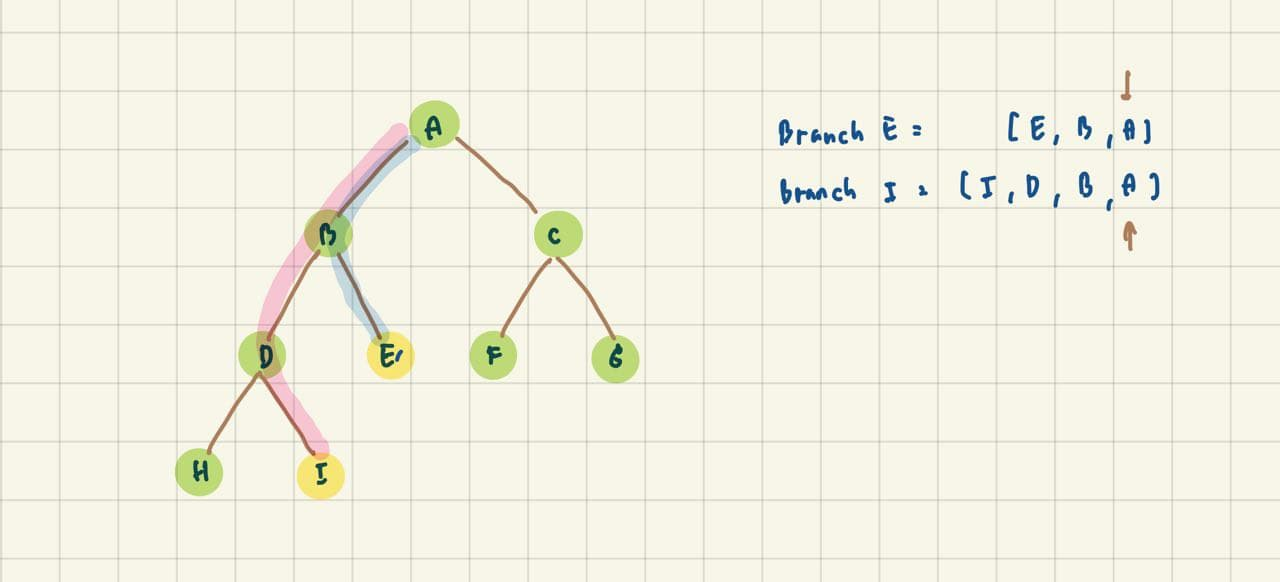

# Solution 2

In [5]:
# Time O(n)
# Space O(d)

def getLowestCommonManager(topManager, reportOne, reportTwo):
  return getOrgInfo(topManager, reportOne, reportTwo).lowestComonManager

def getOrgInfo(manager, reportOne, reportTwo):
  numImportantReports = 0
  for directReport in manager.directReports:
    orgInfo = getOrgInfo(directReport, reportOne, reportTwo)
    if orgInfo.lowestComonManager != None:
      return orgInfo
    numImportantReports += orgInfo.numImportantReports
  if manager == reportOne or manager == reportTwo:
    numImportantReports += 1
  lowestComonManager = manager if numImportantReports == 2 else None
  return OrgInfo(lowestComonManager, numImportantReports)
  

class OrgInfo:
  def __init__(self, lowestComonManager, numImportantReports):
    self.lowestComonManager = lowestComonManager
    self.numImportantReports = numImportantReports

# This is an input class. Do not edit.
class OrgChart:
    def __init__(self, name):
        self.name = name
        self.directReports = []

In [6]:
topManager = OrgChart('A')
topManager.directReports = [OrgChart('B'), OrgChart('C')]
topManager.directReports[0].directReports = [OrgChart('D'), OrgChart('E')]
topManager.directReports[1].directReports = [OrgChart('F'), OrgChart('G')]
topManager.directReports[0].directReports[0].directReports = [OrgChart('H'), OrgChart('I')]

reportOne = topManager.directReports[0].directReports[1]
reportTwo = topManager.directReports[0].directReports[0].directReports[1]

getLowestCommonManager(topManager, reportOne, reportTwo).name

'B'

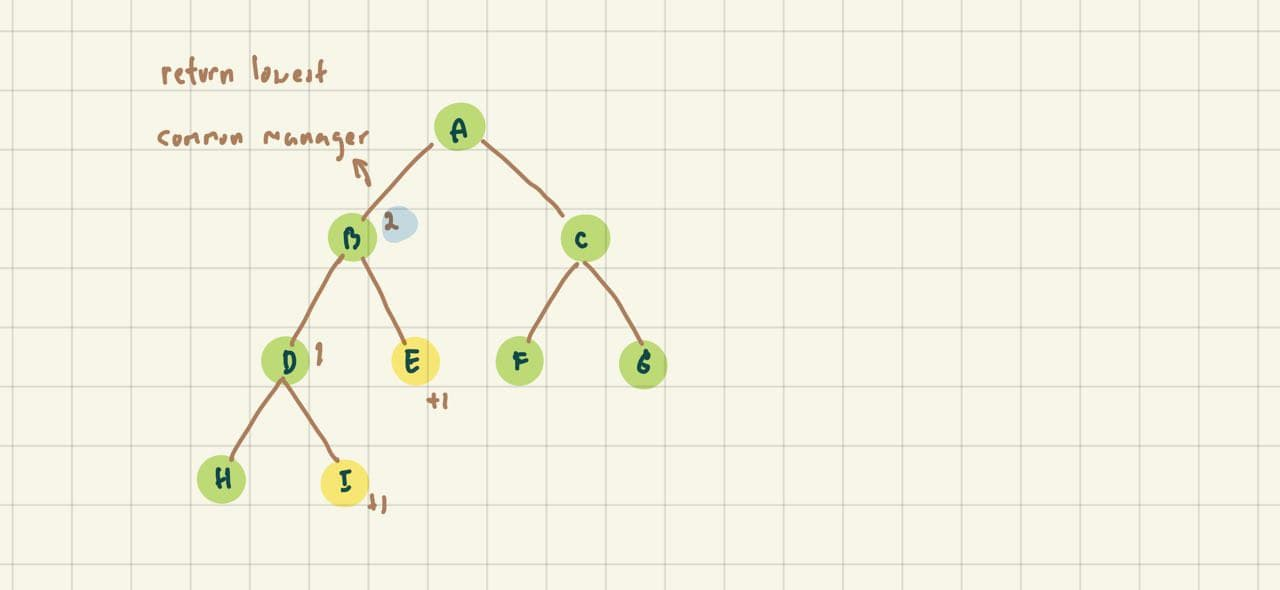

# Solution 3

same as solution 2 but refactor myself

In [7]:
# Time O(n)
# Space O(d)

def getLowestCommonManager(topManager, reportOne, reportTwo):
  _, lowest_common_manager = dfs_lowest_common_manager(topManager, reportOne, reportTwo)
  return lowest_common_manager

def dfs_lowest_common_manager(node, reportOne, reportTwo):
  num_of_found_target = 0
  lowest_common_manager = None
  
  for child in node.directReports:
    num_of_found_target_increment, lowest_common_manager = dfs_lowest_common_manager(child, reportOne, reportTwo)
    if lowest_common_manager != None:
      return None, lowest_common_manager
    num_of_found_target += num_of_found_target_increment
  
  if node == reportOne or node == reportTwo:
    num_of_found_target += 1
  
  if num_of_found_target == 2:
    lowest_common_manager = node
  
  return num_of_found_target, lowest_common_manager

class OrgChart:
    def __init__(self, name):
        self.name = name
        self.directReports = []

In [8]:
topManager = OrgChart('A')
topManager.directReports = [OrgChart('B'), OrgChart('C')]
topManager.directReports[0].directReports = [OrgChart('D'), OrgChart('E')]
topManager.directReports[1].directReports = [OrgChart('F'), OrgChart('G')]
topManager.directReports[0].directReports[0].directReports = [OrgChart('H'), OrgChart('I')]

reportOne = topManager.directReports[0].directReports[1]
reportTwo = topManager.directReports[0].directReports[0].directReports[1]

getLowestCommonManager(topManager, reportOne, reportTwo).name

'B'

In [9]:
topManager = OrgChart('A')
topManager.directReports = [OrgChart('B'), OrgChart('C'), OrgChart('D'), OrgChart('E'), OrgChart('F')]

reportOne = topManager
reportTwo = topManager.directReports[0]

getLowestCommonManager(topManager, reportOne, reportTwo).name

'A'